In [262]:
import pandas as pd
import numpy as np
import math
import pandas as pd
from scipy.stats import *
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report,roc_auc_score, roc_curve, auc, log_loss
import warnings
warnings.filterwarnings("ignore")

### **Context:**
Telecom
### **Objective:**
 A telecom company wants to use their historical customer data and leverage machine learning to predict behaviour in an attempt 
to retain customers. The end goal is to develop focused customer retention programs
### **Data Description:**
 Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The 
data set includes information about:

• Customers who left within the last month – the column is called Churn

• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and 
streaming TV and movies

• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

• Demographic info about customers – gender, age range, and if they have partners and dependents
### **Project Objective**
The objective, as a data scientist hired by the telecom company, is to build a model that will help to identify the 
potential customers who have a higher probability to churn. This will help the company to understand the pain points and patterns of customer 
churn and will increase the focus on strategising customer retention

### Data Understanding & Exploration

In [263]:
# loading the datasets 
df1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
df2 = pd.read_csv("TelcomCustomer-Churn_2.csv")

In [264]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [265]:
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [266]:
# merging both dataframes based on the column name 'customerID'

df = pd.merge(df1, df2, on='customerID')

In [267]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [268]:
# Verifying if all the columns are incorporated in the
#merged DataFrame by using simple comparison Operator in Python

# Get the column names before merging

cols_before = set(df1.columns).union(set(df2.columns))

# Get the column names after merging
cols_after = set(df.columns)

# Compare the column names before and after merging
if cols_before == cols_after:
    print("All columns are incorporated in the merged DataFrame.")
else:
    print("Not all columns are incorporated in the merged DataFrame.")

All columns are incorporated in the merged DataFrame.


### Data Cleaning & Analysis

In [269]:
# checking an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 



The 'TotalCharges' column, typically assumed to hold numeric values, is instead labeled as an object data type. This implies potential presence of unexpected or missing values represented as strings within this column.

Regarding missing values, all columns display a 'Non-Null Count' of 7043, indicating the absence of explicitly marked missing values. Nevertheless, it's crucial to acknowledge the possibility of missing values being disguised as unexpected values within specific columns, such as 'TotalCharges'.

In [270]:
# checking for unique values

unique_values = {}

for col in df.columns:
    unique_values[col] = df[col].unique()

for col, values in unique_values.items():
    print("Unique values in column '{}': {}".format(col, values))

Unique values in column 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in column 'gender': ['Female' 'Male']
Unique values in column 'SeniorCitizen': [0 1]
Unique values in column 'Partner': ['Yes' 'No']
Unique values in column 'Dependents': ['No' 'Yes']
Unique values in column 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in column 'PhoneService': ['No' 'Yes']
Unique values in column 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique values in column 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values in column 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique values in column 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique values in column 'DeviceProtection': ['No' 'Yes' 'No internet serv

In [271]:
# Convert 'TotalCharges' to numeric and handle non-numeric values as NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Identify rows with non-numeric values in 'TotalCharges' column
non_numeric_rows = df[df['TotalCharges'].isnull()]

# Display the rows with non-numeric values
non_numeric_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


We can see NaN values for 'TotalCharges' column , we need to handle those

In [272]:
# Calculate the percentage of null values in the 'TotalCharges' column
null_percentage = (df['TotalCharges'].isnull().sum() / len(df['TotalCharges'])) * 100

print("Percentage of null values in TotalCharges column: {:.2f}%".format(null_percentage))

Percentage of null values in TotalCharges column: 0.16%


In [273]:
# Check for the Distribution of Target variable
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

We can see the target variable is imbalanced

Observing that the missing values in the 'TotalCharges' column correspond to 'No' churn instances consistently, we can opt for a more informed imputation strategy. Using the median value of the 'TotalCharges' column for the 'No' churn class seems a suitable approach. This method ensures data consistency, avoids introducing bias into the distribution, and maintains relevance within the dataset context.

Both mean and median imputation could be considered, opting for median imputation is preferable due to its robustness, especially in the presence of outliers. Additionally, in scenarios with highly imbalanced target columns, such as in this case, median imputation helps prevent undue influence on the minority class ('Churn' = 'Yes').

In [274]:
df.groupby(['Churn'])[['TotalCharges']].median()

,TotalCharges
Churn,
No,1683.60
Yes,703.55


In [275]:
# Determine the median value for each group (Churn = 'Yes' and Churn = 'No')
median_by_churn = df.groupby(['Churn'])[['TotalCharges']].transform('median')

# Replace missing values with the respective group median values based on 'Churn'
df['TotalCharges'].fillna(median_by_churn['TotalCharges'], inplace=True)

In [276]:
# checking the null values for TotalCharges after handling unexpected and missing values

df['TotalCharges'].isnull().sum()


0

In [277]:
# converting columns with  'object' datatype into 'categorical' variables

df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [278]:
df.dtypes

customerID          category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

The columns tenure, MonthlyCharges and TotalCharges are continuous in nature out of which columns 'MonthlyCharges' and 'TotalCharges' are  of datatype 'float64' except 'tenure' which is of datatype 'int64'. 

In [279]:
# converting 'tenure' to type float

df['tenure'] = df['tenure'].astype(float)

In [280]:
df.dtypes

customerID          category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure               float64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [281]:
# Dropping the categorical column customerID as it depicts a unique identifier 
df.drop('customerID', axis=1, inplace=True)

In [282]:
# Creating a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features and shows the percentage distribution

def plot_categorical_pie_charts(dataframe, ncols=3, colors=None):
    # Identify categorical columns
    cat_cols = dataframe.select_dtypes(include='category').columns

    # Calculate the number of rows needed for subplots
    nrows = (len(cat_cols) + ncols - 1) // ncols

    # Create subplots with exact number of rows and columns needed
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 5 * nrows), constrained_layout=True)

    # Flatten axes array
    axes = axes.flatten()

    # Create pie chart for each categorical column
    for idx, column in enumerate(cat_cols):
        cat_counts = dataframe[column].value_counts()
        total_count = len(dataframe)
        percentages = cat_counts / total_count * 100

        # Plot the pie chart in the appropriate subplot
        ax = axes[idx]
        ax.pie(percentages, labels=cat_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
        ax.set_title(f"Percentage Distribution of '{column}'")
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        
    if colors is None:
        colors = [plt.cm.tab10(np.random.rand(len(dataframe[column].unique()))) for column in cat_cols]   

    # If there are empty subplots, remove them
    if len(cat_cols) < nrows * ncols:
        for i in range(len(cat_cols), nrows * ncols):
            fig.delaxes(axes[i])

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

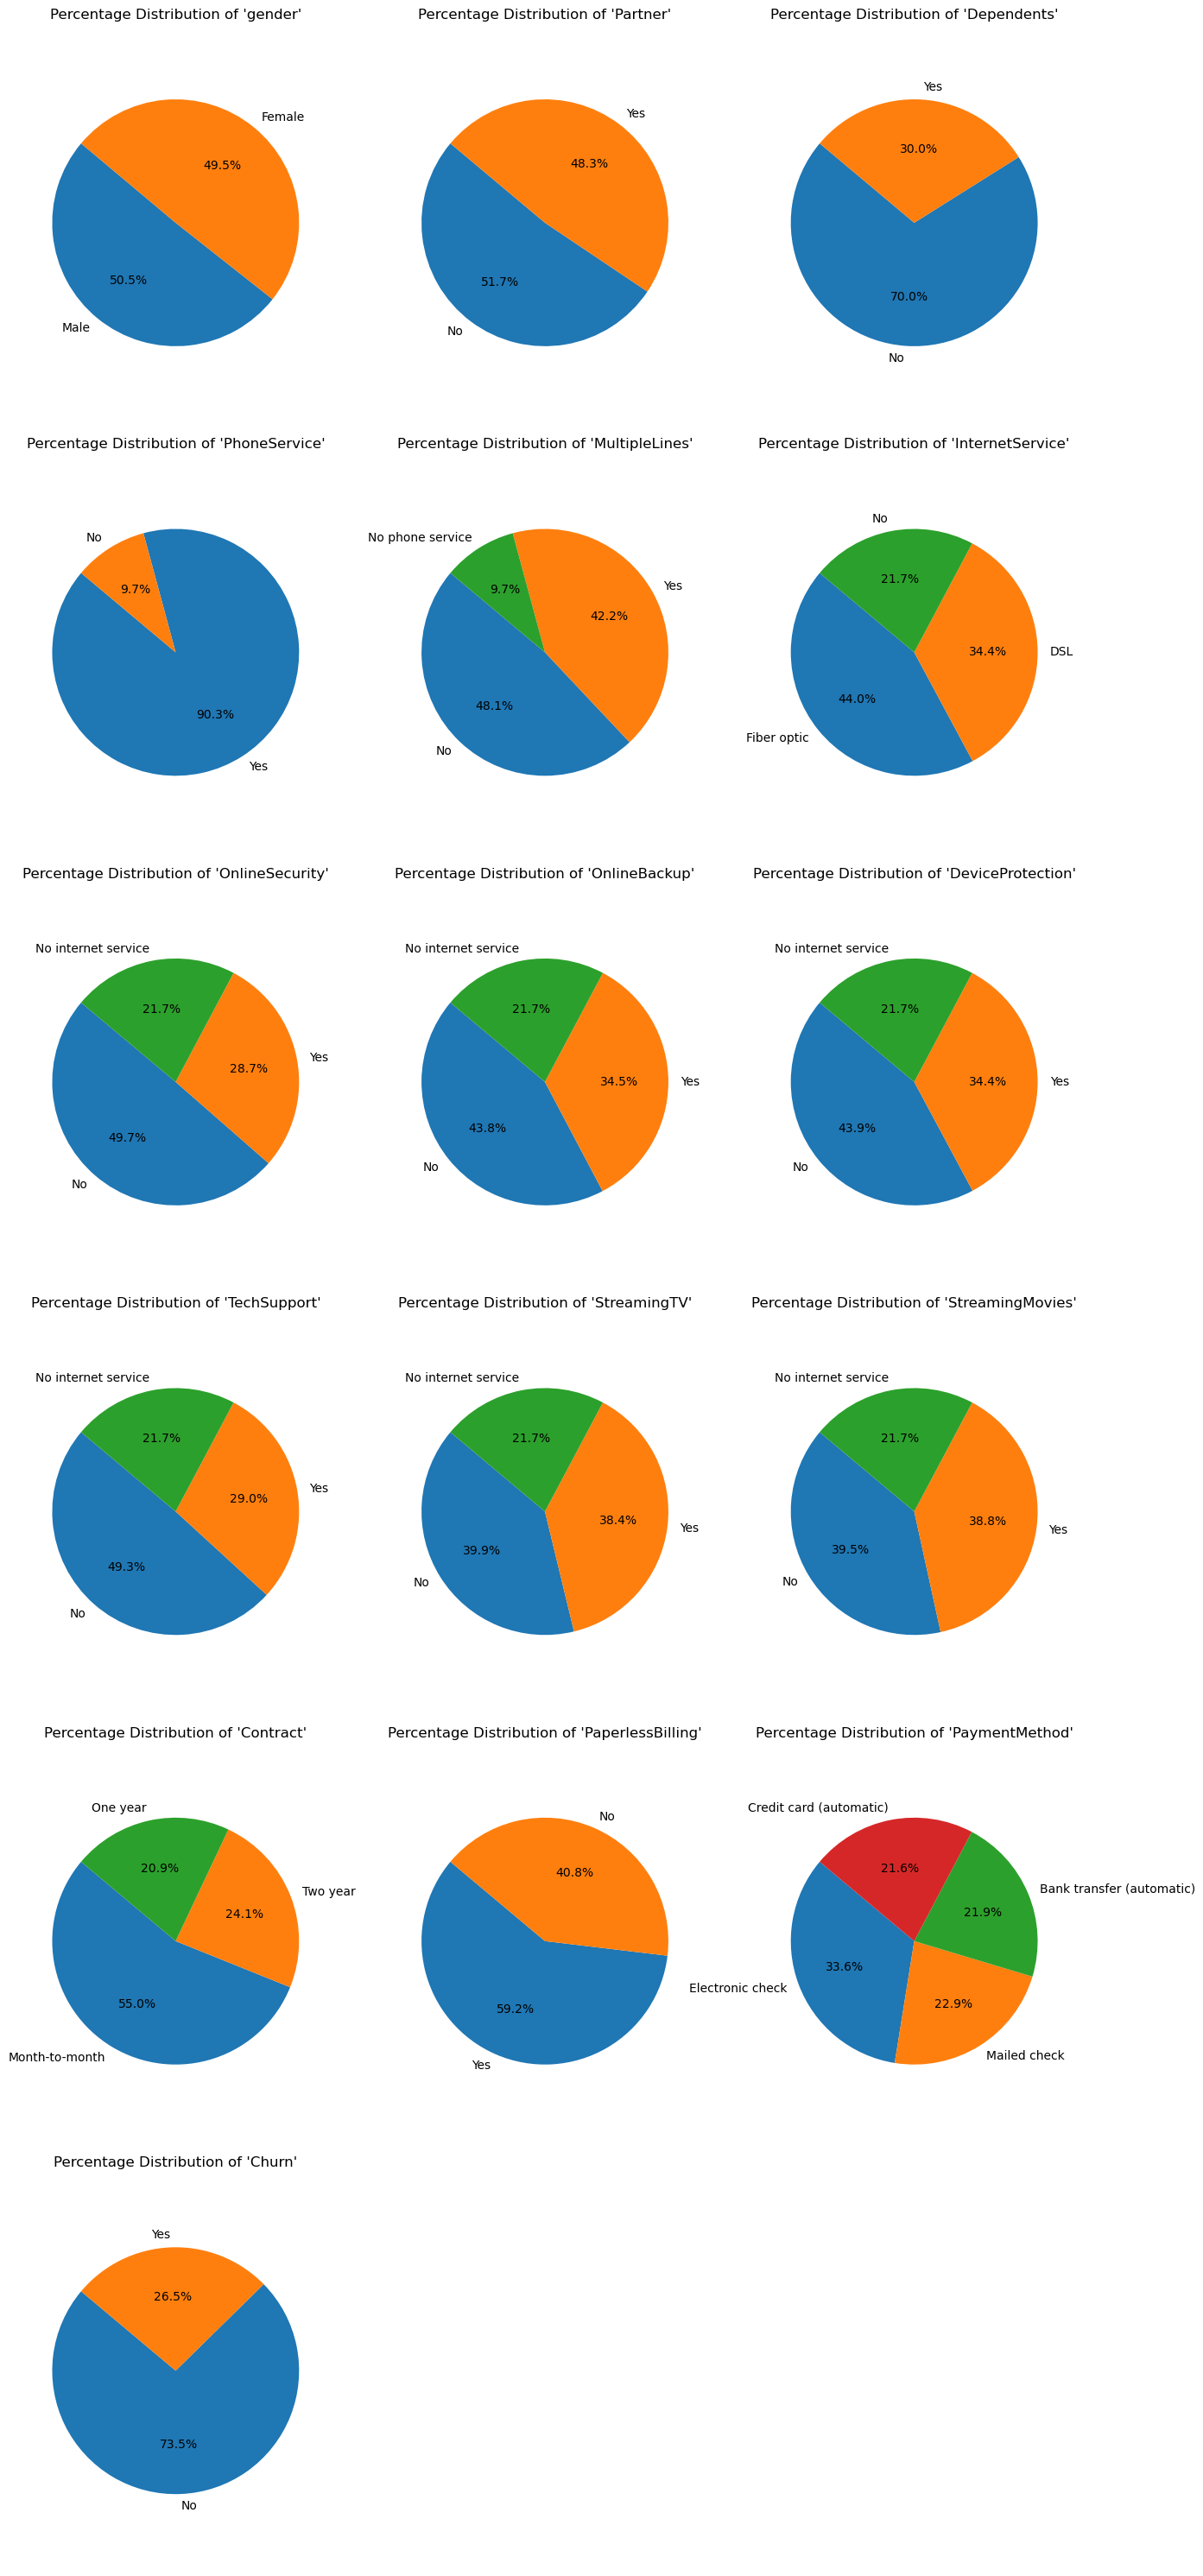

In [283]:
plot_categorical_pie_charts(df, ncols=3)

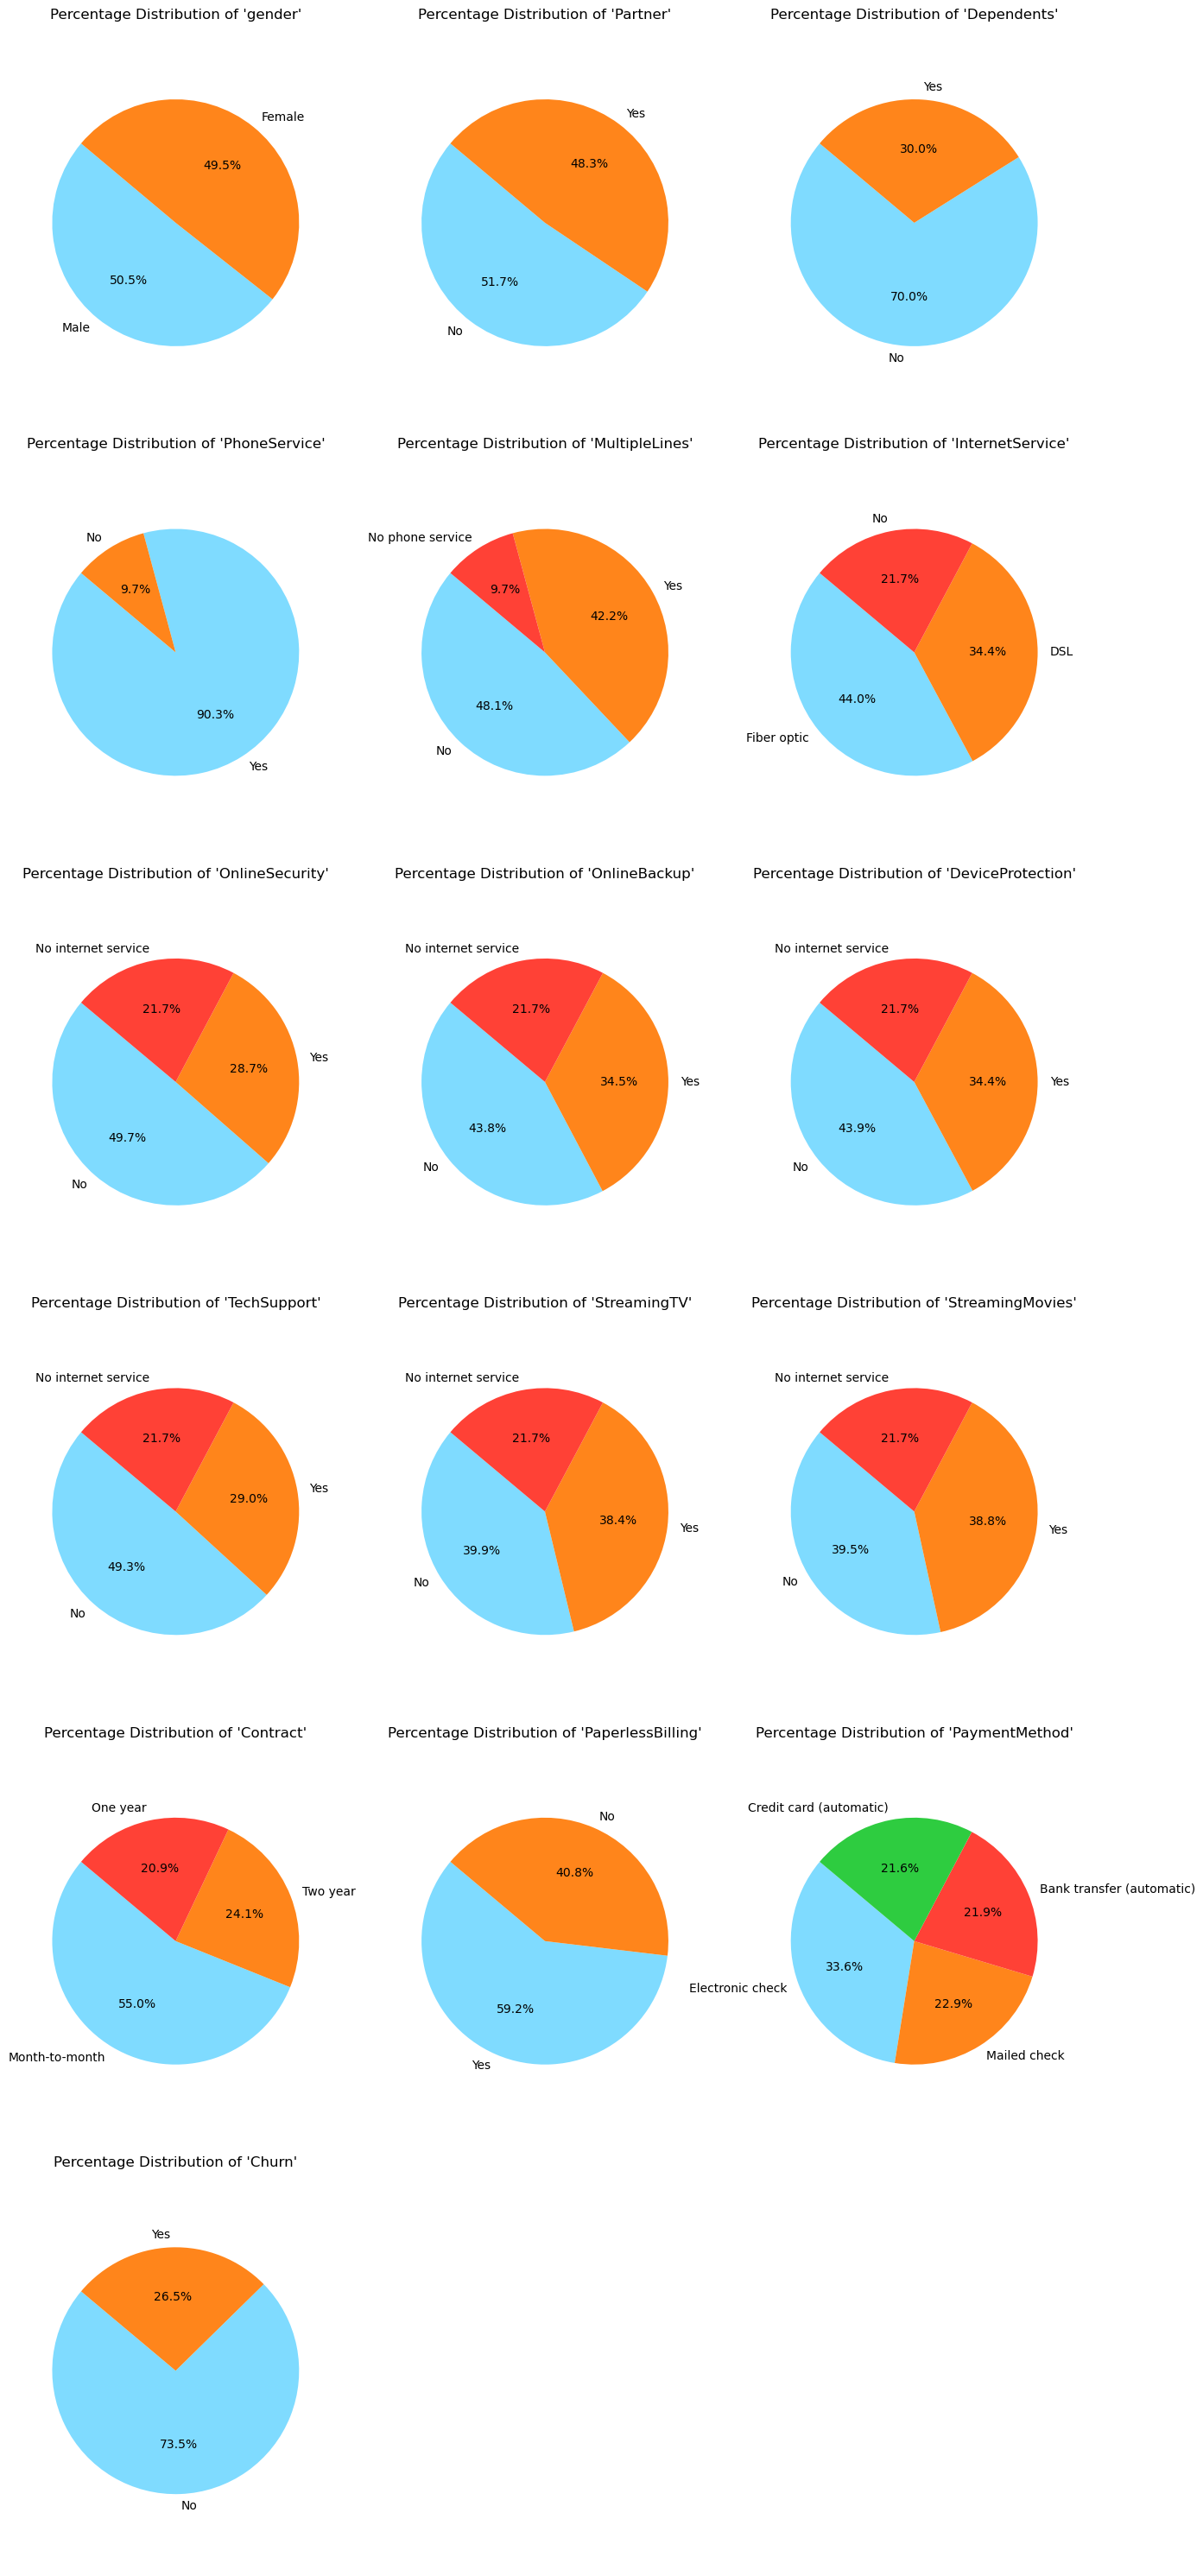

In [284]:
# calling the function with custom colors
colors = ['#7FDBFF', '#FF851B', '#FF4136', '#2ECC40']

plot_categorical_pie_charts(df, ncols=3, colors=colors)

Gender: There are slightly more male customers than female, but the difference isn't significant.

Partner and Dependents: More customers are without partners or dependents compared to those with partners or dependents.

PhoneService: Most customers have phone service, while a few do not.

MultipleLines: The majority have either one or multiple phone lines, with a small minority having none.

InternetService: Fiber optic and DSL are the main types of internet service, with more opting for fiber optic, followed by DSL, and a few having no internet.

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies: Many customers don't subscribe to these services, and some have 'No internet service,' suggesting they may lack internet altogether.

Contract: Month-to-month contracts are the most common, followed by two-year and one-year contracts.

PaperlessBilling: Most customers prefer paperless billing.

PaymentMethod: Electronic check is the most popular payment method, followed by mailed check, bank transfer (automatic), and credit card (automatic).

Churn: There are more customers labeled as 'No' (not churned) compared to 'Yes' (churned), indicating an imbalance in the dataset.

In [285]:
# Encoding of appropriate categorical variables

column_names = list(df.select_dtypes(include='category').columns)
unique_val_counts = []

for column in column_names:
    unique_vals = df[column].nunique()
    unique_val_counts.append(unique_vals)

# Create a DataFrame to display the results
categ_df = pd.DataFrame({'Categorical_column': column_names, 'Unique_value_count': unique_val_counts})

categ_df

,Categorical_column,Unique_value_count
0,gender,2
1,Partner,2
2,Dependents,2
3,PhoneService,2
4,MultipleLines,3
5,InternetService,3
6,OnlineSecurity,3
7,OnlineBackup,3
8,DeviceProtection,3
9,TechSupport,3


In [286]:
# Encoding these columns using Label-encoding
replaceStruct = {
                "Contract":{"Month-to-month": 0, "One year": 1 ,"Two year": 2},
                "gender":{"Female":0, "Male":1},
                "Partner":{"No":0, "Yes":1},
                "Dependents":{"No":0, "Yes":1},
                "PhoneService":{"No":0, "Yes":1},
                "PaperlessBilling":{"No":0, "Yes":1},
                "Churn":{"No":0, "Yes":1}
}

# Encoding these columns using one-hot encoding
oneHotCols=[
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'PaymentMethod'
]


In [287]:
df = df.replace(replaceStruct)
df = pd.get_dummies(df, columns=oneHotCols, drop_first=True)

In [288]:
df.dtypes

gender                                   category
SeniorCitizen                               int64
Partner                                  category
Dependents                               category
tenure                                    float64
PhoneService                             category
Contract                                 category
PaperlessBilling                         category
MonthlyCharges                            float64
TotalCharges                              float64
Churn                                    category
MultipleLines_No phone service               bool
MultipleLines_Yes                            bool
InternetService_Fiber optic                  bool
InternetService_No                           bool
OnlineSecurity_No internet service           bool
OnlineSecurity_Yes                           bool
OnlineBackup_No internet service             bool
OnlineBackup_Yes                             bool
DeviceProtection_No internet service         bool


In [289]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1.0,0,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34.0,1,1,0,56.95,1889.50,...,True,False,False,False,False,False,False,False,False,True
2,1,0,0,0,2.0,1,0,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45.0,0,1,0,42.30,1840.75,...,True,False,True,False,False,False,False,False,False,False
4,0,0,0,0,2.0,1,0,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


In [290]:
# Splitting data into X and Y

X = df.drop(labels="Churn", axis = 1)
Y = df["Churn"]
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1.0,0,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34.0,1,1,0,56.95,1889.50,...,True,False,False,False,False,False,False,False,False,True
2,1,0,0,0,2.0,1,0,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45.0,0,1,0,42.30,1840.75,...,True,False,True,False,False,False,False,False,False,False
4,0,0,0,0,2.0,1,0,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


In [291]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [292]:
# Checking the statistical summary of numerical data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2282.363808,2265.124074,18.80,402.225,1400.55,3786.60,8684.80


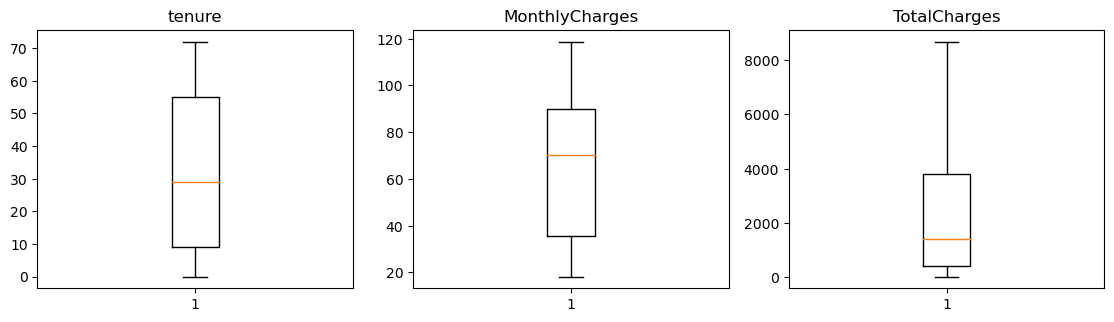

In [293]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

 Since no outliets are present, we can use MinMaxScaler method to scale the features as it preserves the relative relationships between data points.

In [294]:
# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the Min-Max scaler on X_train
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Fit and transform the Min-Max scaler on X_test
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [295]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5634.0,0.160809,0.367388,0.0,0.000000,0.000000,0.000000,1.0
tenure,5634.0,0.449626,0.339230,0.0,0.125000,0.402778,0.763889,1.0
MonthlyCharges,5634.0,0.464517,0.299844,0.0,0.174390,0.520927,0.714375,1.0
TotalCharges,5634.0,0.262090,0.260938,0.0,0.045397,0.160861,0.437089,1.0


In [296]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,1409.0,0.167495,0.373550,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,1409.0,0.449491,0.348620,0.000000,0.111111,0.388889,0.777778,1.000000
MonthlyCharges,1409.0,0.459408,0.299951,0.004484,0.163926,0.513702,0.711510,1.001495
TotalCharges,1409.0,0.257642,0.263207,0.000012,0.038686,0.152706,0.429379,0.998575


Here we can see the statistical summary has been standardised or normalised 

### Model building and performance improvement

In [297]:
# Creating a function to calculate the model evaluation since we have 4 different models to demonstrate.

def eval_model(model, X_train, Y_train, X_test, Y_test):
    
    # Train the model on the scaled training data
    model.fit(X_train, Y_train)

    # Make predictions on both training and test data
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Evaluate the model's performance on the training data
    print("• Performance on Training Data: \n")
    print("  Accuracy: ", accuracy_score(Y_train, Y_train_pred))
    print("  Precision:", precision_score(Y_train, Y_train_pred))
    print("  Recall:", recall_score(Y_train, Y_train_pred))
    print("  F1 Score:", f1_score(Y_train, Y_train_pred))
    print("  Confusion Matrix:\n", confusion_matrix(Y_train, Y_train_pred),'\n')

    # Evaluate the model's performance on the test data
    print("\n• Performance on Test Data: \n")
    print("  Accuracy:", accuracy_score(Y_test, Y_test_pred))
    print("  Precision:", precision_score(Y_test, Y_test_pred))
    print("  Recall:", recall_score(Y_test, Y_test_pred))
    print("  F1 Score:", f1_score(Y_test, Y_test_pred),'\n')

    # Print confusion matrix for Test data
    print("  Confusion Matrix for Test Data:")
    conf_matrix = confusion_matrix(Y_test, Y_test_pred, labels=[0, 1])
    df_conf_matrix = pd.DataFrame(conf_matrix, index=["Actual No", "Actual Yes"],
                    columns=["Predicted No", "Predicted Yes"])
    plt.figure(figsize=(5, 4))
    plt.figure(figsize = (5,4))
    sns.heatmap(df_conf_matrix, annot=True ,fmt='g')
    plt.xlabel('Predicted value')
    plt.ylabel('Actual value')
    print()

• Performance on Training Data: 

  Accuracy:  0.9985800496982605
  Precision: 0.9986595174262735
  Recall: 0.9959893048128342
  F1 Score: 0.9973226238286479
  Confusion Matrix:
 [[4136    2]
 [   6 1490]] 


• Performance on Test Data: 

  Accuracy: 0.7310149041873669
  Precision: 0.4921875
  Recall: 0.5067024128686327
  F1 Score: 0.49933949801849403 

  Confusion Matrix for Test Data:



<Figure size 500x400 with 0 Axes>

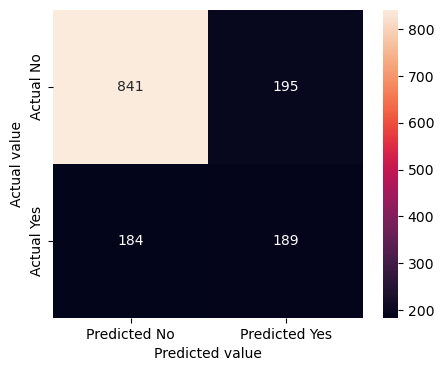

In [298]:
# Training the model using Decision tree and check the performance of the model on train and test data

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Evaluate the performance of the Decision Tree model
eval_model(decision_tree, X_train, Y_train, X_test, Y_test)


In [299]:
# using grid search to improve the performance of the model

decision_tree = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(2, 15)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': list(range(1, 5))
}

# Initialize GridSearchCV with the Decision Tree classifier and the hyperparameter grid
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}


• Performance on Training Data: 

  Accuracy:  0.7987220447284346
  Precision: 0.6221322537112011
  Recall: 0.6163101604278075
  F1 Score: 0.6192075218267293
  Confusion Matrix:
 [[3578  560]
 [ 574  922]] 


• Performance on Test Data: 

  Accuracy: 0.8026969481902059
  Precision: 0.622107969151671
  Recall: 0.6487935656836461
  F1 Score: 0.6351706036745407 

  Confusion Matrix for Test Data:



<Figure size 500x400 with 0 Axes>

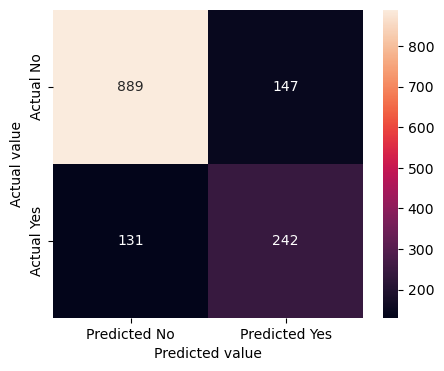

In [300]:
# Initialize the DecisionTree classifier with best hyperparameters

best_decision_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=2,
    splitter='best',
    random_state=42
)

# Evaluate the performance of the Decision Tree model with best hyperparameter combination
eval_model(best_decision_tree, X_train, Y_train, X_test, Y_test)

In summary, the grid search model performs slightly better than the base decision tree model on both the training and test datasets, with higher accuracy, precision, recall, and F1 score. The base decision tree model has an extremely high accuracy on the training data, indicating potential overfitting. So, the grid search model perfoms better.

• Performance on Training Data: 

  Accuracy:  0.9984025559105432
  Precision: 0.9966599866399466
  Recall: 0.9973262032085561
  F1 Score: 0.9969929836284664
  Confusion Matrix:
 [[4133    5]
 [   4 1492]] 


• Performance on Test Data: 

  Accuracy: 0.794889992902768
  Precision: 0.6555555555555556
  Recall: 0.4745308310991957
  F1 Score: 0.5505443234836703 

  Confusion Matrix for Test Data:



<Figure size 500x400 with 0 Axes>

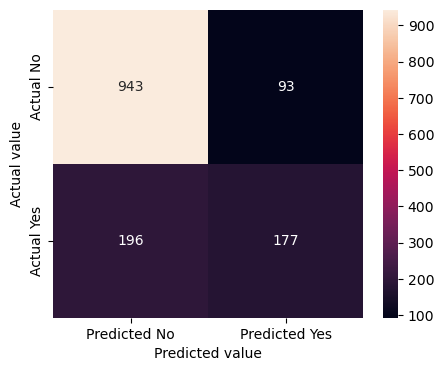

In [301]:
# Training the model using randomforest classifier and check the performance of the model on train and test data

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Evaluate the performance 
eval_model(random_forest, X_train, Y_train, X_test, Y_test)

In [302]:
# using gridsearch to improve the performance of the model and choose the best hyperparameter

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': list(range(1, 5)), 
    'bootstrap': [True, False], 
}

# Initialize GridSearchCV with the Random Forest classifier and the hyperparameter grid
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


• Performance on Training Data: 

  Accuracy:  0.8714944976925808
  Precision: 0.8368237347294939
  Recall: 0.641042780748663
  F1 Score: 0.7259651778955336
  Confusion Matrix:
 [[3951  187]
 [ 537  959]] 


• Performance on Test Data: 

  Accuracy: 0.8126330731014905
  Precision: 0.6996336996336996
  Recall: 0.5120643431635389
  F1 Score: 0.5913312693498453 

  Confusion Matrix for Test Data:



<Figure size 500x400 with 0 Axes>

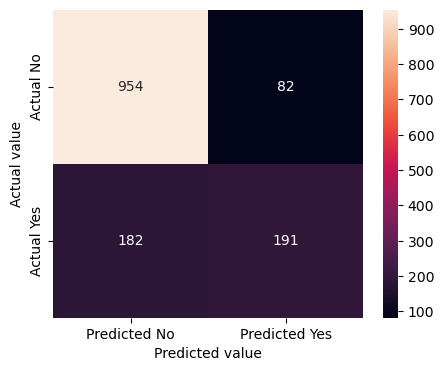

In [303]:
# Initialize the RandomForest classifier with best hyperparameters
best_random_forest = RandomForestClassifier(
    n_estimators=300,
    max_depth=30,
    min_samples_leaf=4,
    min_samples_split=2,
    bootstrap=True,
    random_state=42 
)

# Evaluate the performance 
eval_model(best_random_forest, X_train, Y_train, X_test, Y_test)

In summary, the grid search model for randomforest outperforms the base model on both the training and test datasets in terms of accuracy, precision, recall, and F1 score. It shows improved generalization performance compared to the base model. However, it's worth noting that both models perform significantly better on the training data compared to the test data, indicating potential overfitting, especially in the case of the base model.

• Performance on Training Data: 

  Accuracy:  0.8056443024494143
  Precision: 0.6726959517657192
  Recall: 0.5220588235294118
  F1 Score: 0.5878810688746707
  Confusion Matrix:
 [[3758  380]
 [ 715  781]] 


• Performance on Test Data: 

  Accuracy: 0.8097941802696949
  Precision: 0.6677316293929713
  Recall: 0.5603217158176944
  F1 Score: 0.60932944606414 

  Confusion Matrix for Test Data:



<Figure size 500x400 with 0 Axes>

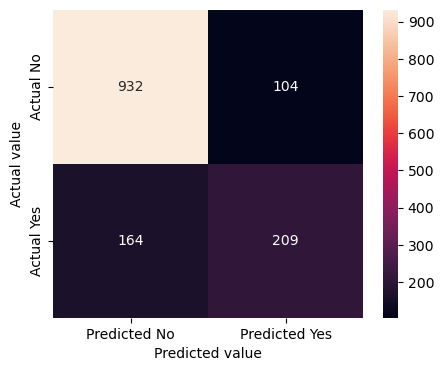

In [304]:
# Training the model using AdaBoost and check the performance of the model on train and test data

# Initialize the AdaBoost classifier
ada_cl = AdaBoostClassifier()

# Evaluate the performance 
eval_model(ada_cl, X_train, Y_train, X_test, Y_test)

In [305]:
# using gridsearch to improve the performance of the adaboost model

# Create the base estimator (weak learner)
base_estimator = DecisionTreeClassifier(random_state=42)

# Create the AdaBoost Classifier
ada_clf = AdaBoostClassifier(estimator=base_estimator)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200, 300], 
    'learning_rate': [0.1, 0.5, 1.0], 
    'algorithm': ['SAMME', 'SAMME.R'] 
}

# Create the GridSearchCV object
grid_search = GridSearchCV(ada_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on your data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 200}


• Performance on Training Data: 

  Accuracy:  0.8001419950301739
  Precision: 0.6589347079037801
  Recall: 0.5127005347593583
  F1 Score: 0.5766917293233083
  Confusion Matrix:
 [[3741  397]
 [ 729  767]] 


• Performance on Test Data: 

  Accuracy: 0.808374733853797
  Precision: 0.6645367412140575
  Recall: 0.5576407506702413
  F1 Score: 0.6064139941690961 

  Confusion Matrix for Test Data:



<Figure size 500x400 with 0 Axes>

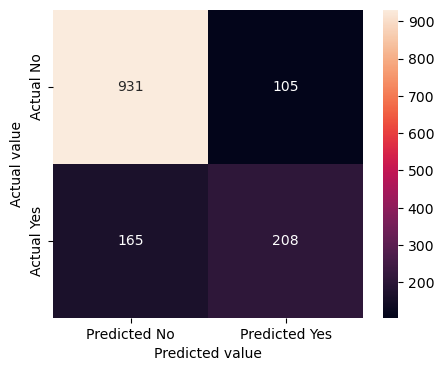

In [306]:
# Initialize the AdaBoost classifier with the best hyperparameters
best_ada = AdaBoostClassifier(
    n_estimators=200,
    algorithm='SAMME',
    learning_rate=0.5,
    random_state=42
)

# Evaluate the performance 
eval_model(best_ada, X_train, Y_train, X_test, Y_test)

In summary, both the grid search AdaBoost model and the base AdaBoost model show similar performance on both the training and test datasets. The grid search model slightly outperforms the base model in terms of accuracy, precision, recall, and F1 score on the test data, but the differences are not substantial. Both models exhibit similar trends in their performance metrics.

• Performance on Training Data: 

  Accuracy:  0.8249911253106141
  Precision: 0.717948717948718
  Recall: 0.5614973262032086
  F1 Score: 0.6301575393848462
  Confusion Matrix:
 [[3808  330]
 [ 656  840]] 


• Performance on Test Data: 

  Accuracy: 0.8097941802696949
  Precision: 0.6721311475409836
  Recall: 0.5495978552278821
  F1 Score: 0.6047197640117994 

  Confusion Matrix for Test Data:



<Figure size 500x400 with 0 Axes>

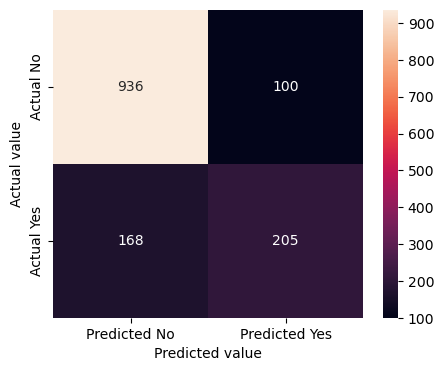

In [307]:
# Training the model using GradientBoost and check the performance of the model on train and test data

# Initialize the GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=42)

# Evaluate the performance 
eval_model(gbcl, X_train, Y_train, X_test, Y_test)

In [308]:
# using gridsearch to improve the performance 

# Initialize the GradientBoostingClassifier
grad_boost = GradientBoostingClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
    'max_depth': list(range(1, 5))
}

# Initialize the GridSearchCV 
grid_search = GridSearchCV(grad_boost, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


• Performance on Training Data: 

  Accuracy:  0.8255236066737665
  Precision: 0.7213114754098361
  Recall: 0.5588235294117647
  F1 Score: 0.6297551789077213
  Confusion Matrix:
 [[3815  323]
 [ 660  836]] 


• Performance on Test Data: 

  Accuracy: 0.8105039034776437
  Precision: 0.6754966887417219
  Recall: 0.546916890080429
  F1 Score: 0.6044444444444445 

  Confusion Matrix for Test Data:



<Figure size 500x400 with 0 Axes>

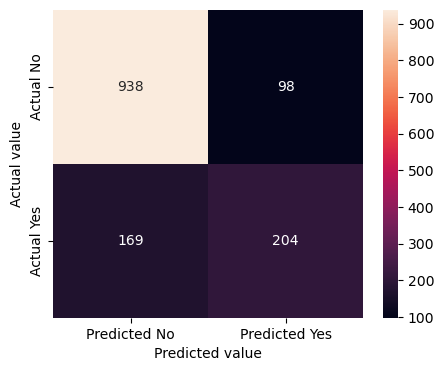

In [309]:
# Initialize the GradientBoosting Classifier with best hyperparameters
best_gb = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.2,
    max_depth=3,
    random_state=42
)

# Evaluate the performance 
eval_model(best_gb, X_train, Y_train, X_test, Y_test)


In summary, both the grid search GradientBoost model and the base GradientBoost model demonstrate comparable performance on both the training and test datasets. While the grid search model exhibits slightly higher accuracy, precision, recall, and F1 score on the test data compared to the base model, the disparities are not significant. Both models display similar trends in their performance metrics.

### Summary

(1) Compare the performance of each model in train stage and test stage

In the training stage, the base decision tree model achieved very high accuracy, precision, recall, and F1 score, indicating excellent performance on the training data. However, this model seems to have overfit the training data, as evidenced by the significant drop in performance on the test data.

On the other hand, the grid-searched decision tree model exhibits slightly lower performance metrics on the training data compared to the base model but generalizes better to the test data, as indicated by higher accuracy, precision, recall, and F1 score.

Similarly, the base random forest model shows high performance on the training data but struggles with generalization, as seen in its lower performance on the test data. The grid-searched random forest model performs better on the test data compared to its base counterpart, indicating improved generalization.

The base AdaBoost model performs reasonably well on both the training and test data, although it exhibits some overfitting, as seen in the drop in performance metrics on the test data compared to the training data. The grid-searched AdaBoost model also demonstrates good generalization, with slightly higher performance on the test data compared to its base version.

Finally, both the base and grid-searched gradient boosting models show consistent performance on both training and test data, with slightly better generalization observed in the grid-searched version.

(2) Provide your observation on which model performed the best

Among the models evaluated, the grid-searched gradient boosting model appears to perform the best. It achieves high accuracy, precision, recall, and F1 score on both the training and test data. Additionally, it shows good generalization, with similar performance observed on both datasets.

(3) Provide your reasoning on why the model performed best

Gradient boosting is an ensemble learning technique that builds strong predictive models by combining multiple weak learners sequentially. By iteratively improving upon the errors made by previous models, gradient boosting tends to produce highly accurate predictions. Grid search further optimizes hyperparameters, allowing the model to find the best combination of parameters for improved performance.

In this case, the grid-searched gradient boosting model likely outperforms other models due to its ability to effectively handle complex relationships in the data while minimizing overfitting. The iterative nature of gradient boosting, coupled with hyperparameter tuning through grid search, enables the model to capture intricate patterns in the data, leading to superior predictive performance.

(4) Provide your final conclusion on your observation

Overall, the grid-searched gradient boosting model is recommended for predictive modeling in this scenario due to its robust performance and ability to generalize well to unseen data.